In [1]:
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.mstats import winsorize

In [2]:
#  !pip install xlrd
# Load the XLS file
xls_file = "default_credit_score.xls"
df = pd.read_excel(xls_file)

# Set the second row as header
df.columns = df.iloc[0]  # Assign the second row as header
df = df[1:].reset_index(drop=True)  # Remove the first row and reset index

# Save as CSV
csv_file = "default_credit_score.csv"
df.to_csv(csv_file, index=False)

print(f"File saved as {csv_file} with corrected headers.")

File saved as default_credit_score.csv with corrected headers.


In [3]:
df = pd.read_csv("default_credit_score.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Credit Card Default Dataset

## 🔹 Dependent Variable (Target Variable)
- `default payment next month` (Binary Variable)
  - `1`: Default (Yes)
  - `0`: No Default (No)

---

## 🔹 Explanatory Variables (23 Total)
### 📌 1. Personal Information
- **X1**: Credit limit amount (NT dollars) – includes both individual and family (supplementary) credit.
- **X2**: Gender  
  - `1`: Male  
  - `2`: Female  
- **X3**: Education Level  
  - `1`: Graduate school  
  - `2`: University  
  - `3`: High school  
  - `4`: Others  
- **X4**: Marital Status  
  - `1`: Married  
  - `2`: Single  
  - `3`: Others  
- **X5**: Age (Years)

---

### 📌 2. Past Payment History (`X6 - X11`)
- Monthly repayment records from **April to September 2005**  
  - **X6**: Repayment status in September 2005  
  - **X7**: Repayment status in August 2005  
  - **X8**: Repayment status in July 2005  
  - **X9**: Repayment status in June 2005  
  - **X10**: Repayment status in May 2005  
  - **X11**: Repayment status in April 2005  

📌 **Repayment Status Codes**
- `-1`: Paid on time
- `-2`: not used
- `1`: 1-month delay  
- `2`: 2-month delay  
- ...  
- `9`: 9+ months delay  

---

### 📌 3. Monthly Bill Statement Amount (`X12 - X17`)
- Credit card bill statement amounts (NT dollars) for each month  
  - **X12**: Bill amount in September 2005  
  - **X13**: Bill amount in August 2005  
  - **X14**: Bill amount in July 2005  
  - **X15**: Bill amount in June 2005  
  - **X16**: Bill amount in May 2005  
  - **X17**: Bill amount in April 2005  

---

### 📌 4. Monthly Payment Amount (`X18 - X23`)
- Actual payment amounts (NT dollars) for each month  
  - **X18**: Amount paid in September 2005  
  - **X19**: Amount paid in August 2005  
  - **X20**: Amount paid in July 2005  
  - **X21**: Amount paid in June 2005  
  - **X22**: Amount paid in May 2005  
  - **X23**: Amount paid in April 2005  , 2005.

In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [4]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [5]:
df.duplicated().sum()

0

### we don't have any missing values and duplicates.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

In [9]:
for col in df.columns:
    print(df[col].value_counts())

ID
1        1
19997    1
20009    1
20008    1
20007    1
        ..
9996     1
9995     1
9994     1
9993     1
30000    1
Name: count, Length: 30000, dtype: int64
LIMIT_BAL
50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: count, Length: 81, dtype: int64
SEX
2    18112
1    11888
Name: count, dtype: int64
EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64
MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64
AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247


### Visualization

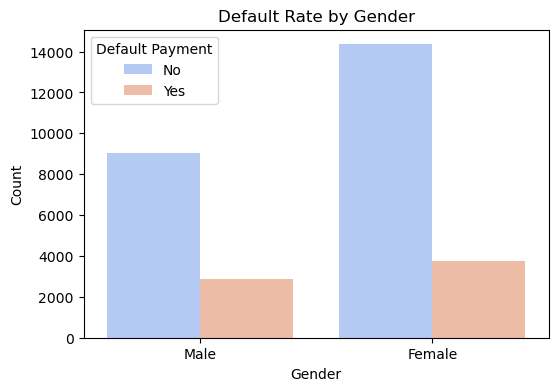

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='SEX', hue='default payment next month', data=df, palette='coolwarm')
plt.xticks([0, 1], ['Male','Female'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Default Rate by Gender')
plt.legend(title='Default Payment', labels=['No','Yes'])
plt.show()

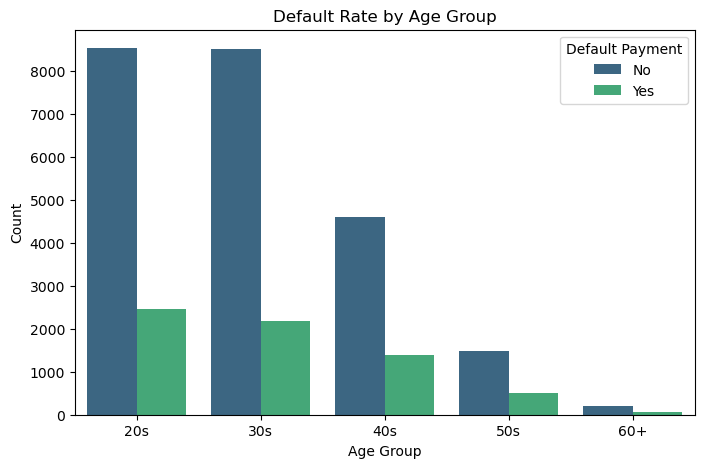

In [11]:
# new column of group by age
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[20, 30, 40, 50, 60, 100], labels=['20s', '30s', '40s', '50s', '60+'])

plt.figure(figsize=(8,5))
sns.countplot(x='AGE_GROUP', hue='default payment next month', data=df, palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Default Rate by Age Group')
plt.legend(title='Default Payment', labels=['No', 'Yes'])
plt.show()

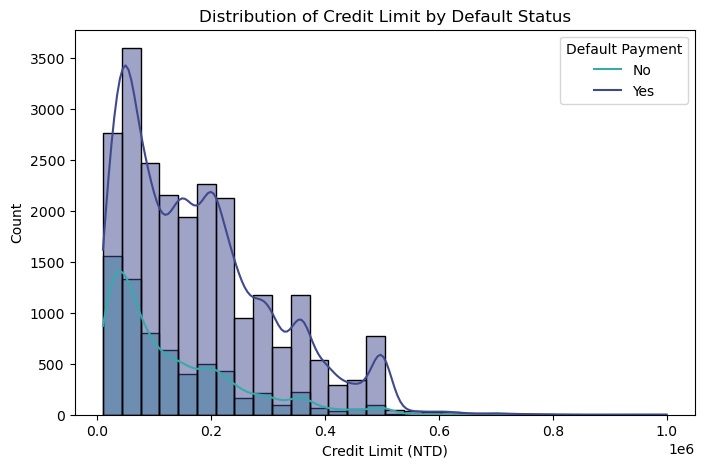

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='LIMIT_BAL', hue='default payment next month', bins=30, kde=True, palette='mako')
plt.xlabel('Credit Limit (NTD)')
plt.ylabel('Count')
plt.title('Distribution of Credit Limit by Default Status')
plt.legend(title='Default Payment', labels=['No', 'Yes'])
plt.show()

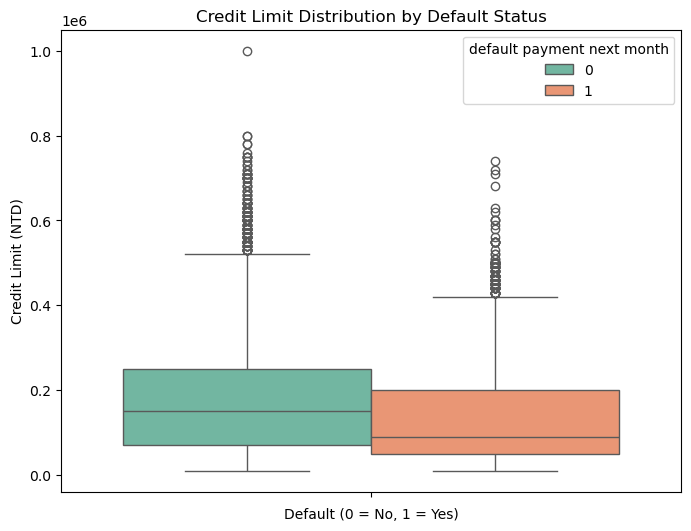

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(hue="default payment next month", y="LIMIT_BAL", data=df, palette="Set2")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Credit Limit (NTD)")
plt.title("Credit Limit Distribution by Default Status")
plt.show()

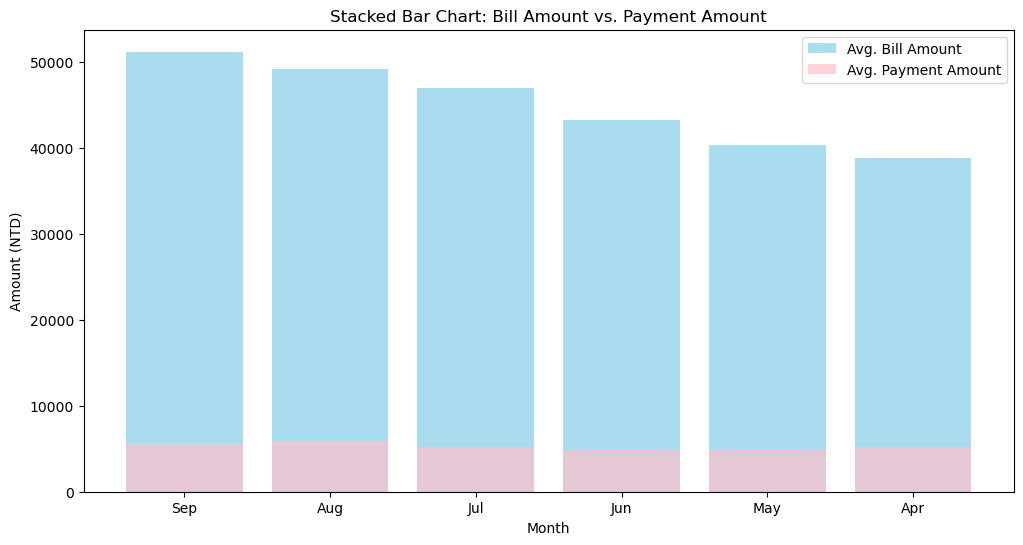

In [14]:
bill_cols = ["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]
pay_amt_cols = ["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]

bill_means = df[bill_cols].mean()
pay_means = df[pay_amt_cols].mean()

x = np.arange(len(bill_cols))

plt.figure(figsize=(12, 6))
plt.bar(x, bill_means, label="Avg. Bill Amount", color="skyblue", alpha=0.7)
plt.bar(x, pay_means, label="Avg. Payment Amount", color="pink", alpha=0.7)

plt.xticks(x, labels=["Sep", "Aug", "Jul", "Jun", "May", "Apr"])  # 월 표시
plt.xlabel("Month")
plt.ylabel("Amount (NTD)")
plt.title("Stacked Bar Chart: Bill Amount vs. Payment Amount")
plt.legend()
plt.show()

In [15]:
df = df.drop(['ID','AGE_GROUP'], axis=1)

In [16]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [27]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,164061.989333,1.603733,1.840400,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,121035.014953,0.489129,0.744097,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,430000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


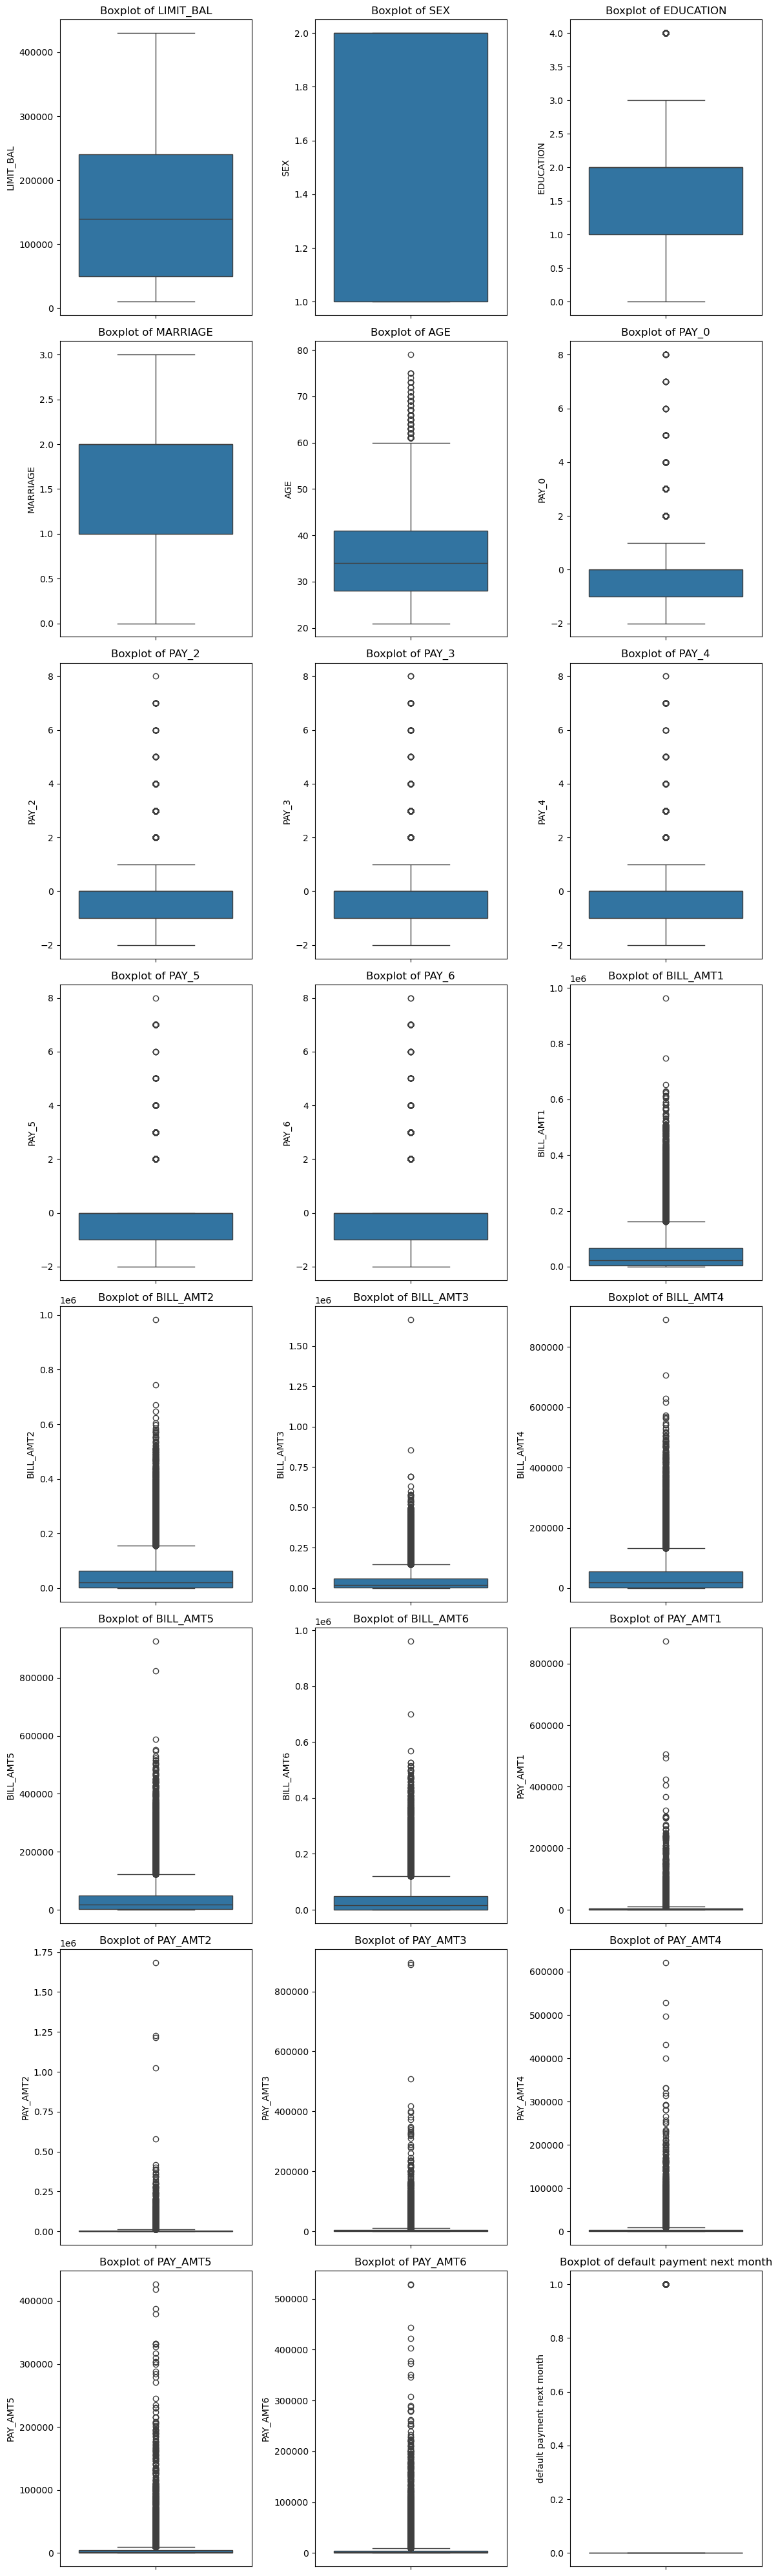

In [29]:
cols_per_row = 3  # 한 줄에 몇 개의 박스플롯을 표시할지
num_plots = len(df.columns)  # 전체 컬럼 개수
num_rows = int(np.ceil(num_plots / cols_per_row))  # 필요한 행 개수

# 서브플롯 생성
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(12, 5 * num_rows))

# 1개의 플롯이면 배열 변환
if num_rows == 1:
    axes = np.array([axes])

axes = axes.flatten()  # 1D 배열로 변환

# 박스플롯 그리기
for i, col in enumerate(df.columns):
    sns.boxplot(data=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")


plt.tight_layout()
plt.show()

In [25]:
lower_limit = df['LIMIT_BAL'].quantile(0.00)  # 하위 0%
upper_limit = df['LIMIT_BAL'].quantile(0.95)  # 상위 5%
df['LIMIT_BAL'] = df['LIMIT_BAL'].clip(lower=lower_limit, upper=upper_limit)

df.loc[df['EDUCATION'].isin([5,6]), "EDUCATION"] = 4 # 5,6 we don't know so put the others

In [30]:
# only numerical data type
columns = df.columns
for value in columns:
    Q1 = df[value].quantile(0.25)
    Q3 = df[value].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR
     # check number of outliers
    outliers = df[(df[value] < lower_bound) | (df[value] > upper_bound)] 
    num_outliers = outliers.shape[0]
    outlier_ratio = (num_outliers / len(df[value])) * 100
    print(f"{value}: {outlier_ratio: .2f}%")

LIMIT_BAL:  0.00%
SEX:  0.00%
EDUCATION:  1.51%
MARRIAGE:  0.00%
AGE:  0.91%
PAY_0:  10.43%
PAY_2:  14.70%
PAY_3:  14.03%
PAY_4:  11.69%
PAY_5:  9.89%
PAY_6:  10.26%
BILL_AMT1:  7.99%
BILL_AMT2:  7.98%
BILL_AMT3:  8.23%
BILL_AMT4:  8.73%
BILL_AMT5:  9.08%
BILL_AMT6:  8.96%
PAY_AMT1:  9.15%
PAY_AMT2:  9.05%
PAY_AMT3:  8.66%
PAY_AMT4:  9.98%
PAY_AMT5:  9.82%
PAY_AMT6:  9.86%
default payment next month:  22.12%


In [28]:
# we focused on "default rate" so minus values set the 0.
for i in range(1,7):
    df[f"BILL_AMT{i}"] = df[f"BILL_AMT{i}"].clip(lower=0)

In [33]:
# only numerical data type
columns = ["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", 
          "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6" ]

for value in columns:
    df[value] = df[value].astype(float)
    
    Q1 = df[value].quantile(0.25)
    Q3 = df[value].quantile(0.75)
    IQR = Q3 - Q1 
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # set median instead of outlier
    median_value = df[value].median()
    df.loc[(df[value] < lower_bound) | (df[value] > upper_bound), value] = median_value
    

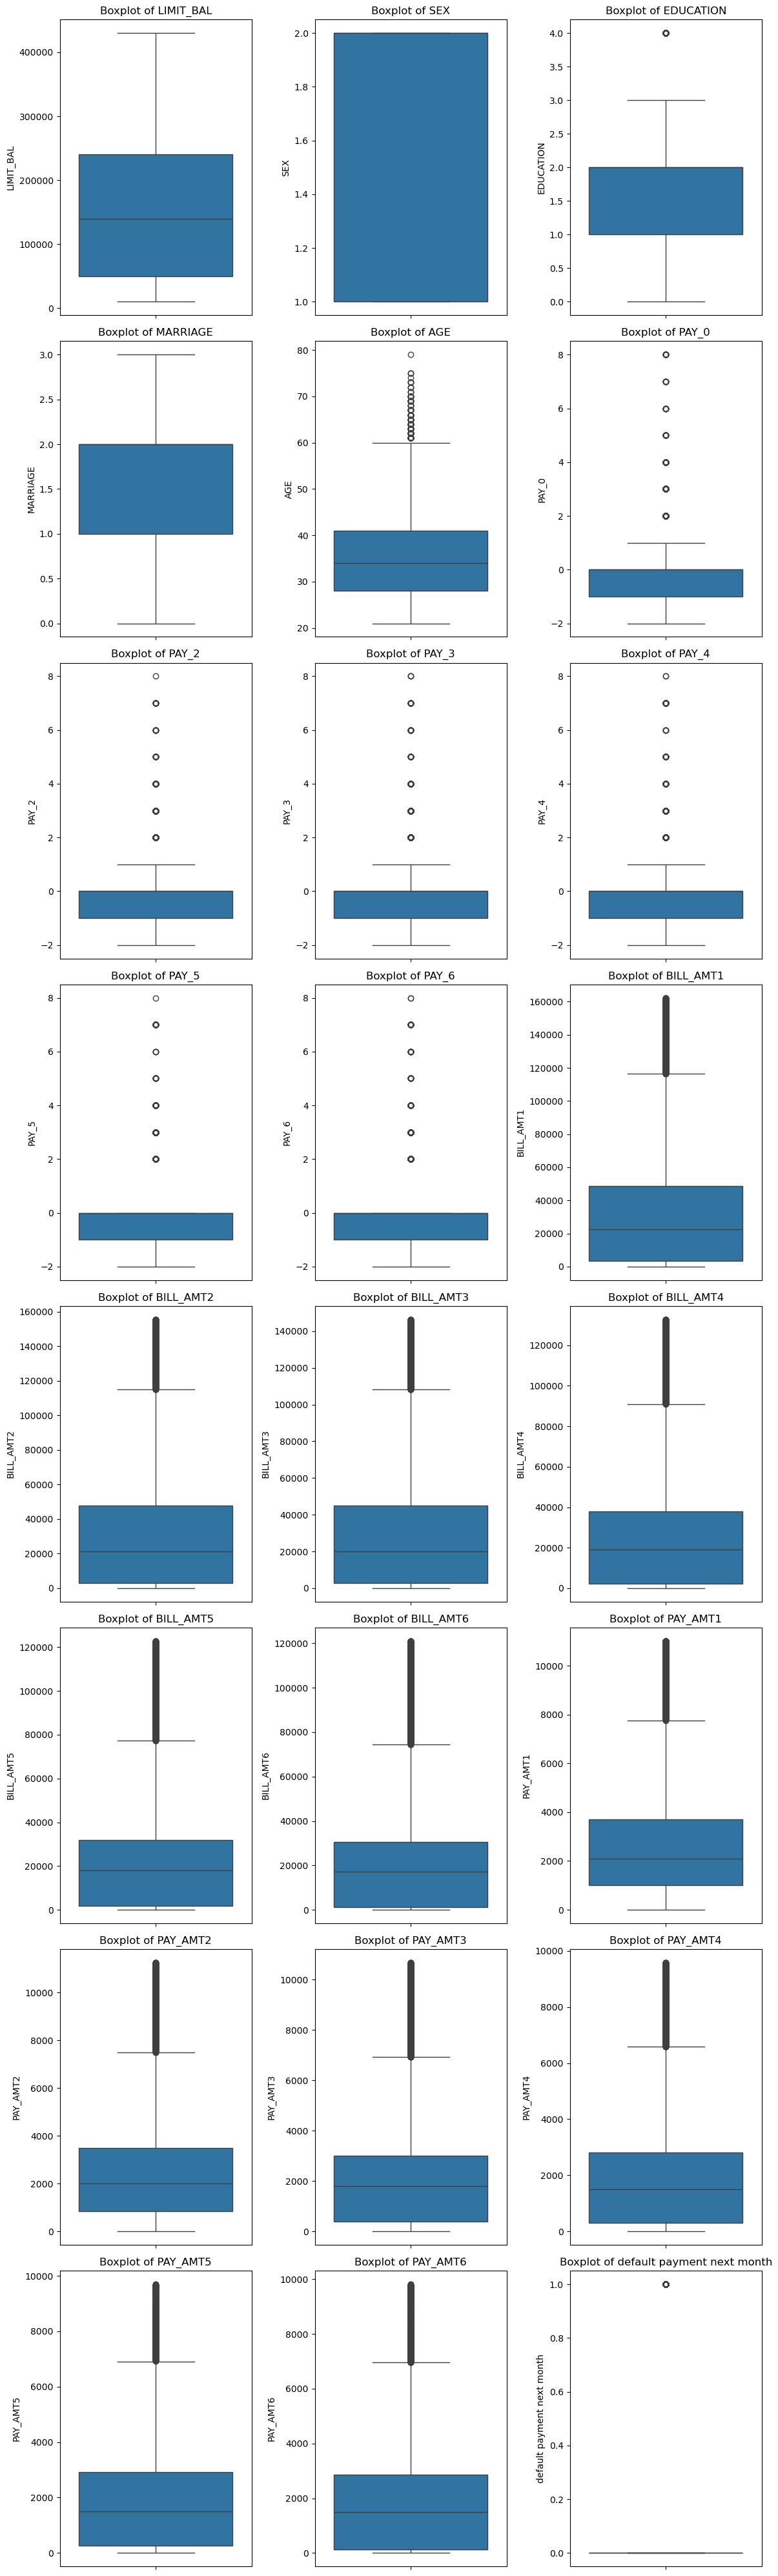

In [34]:
cols_per_row = 3  # 한 줄에 몇 개의 박스플롯을 표시할지
num_plots = len(df.columns)  # 전체 컬럼 개수
num_rows = int(np.ceil(num_plots / cols_per_row))  # 필요한 행 개수

# 서브플롯 생성
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(12, 5 * num_rows))

# 1개의 플롯이면 배열 변환
if num_rows == 1:
    axes = np.array([axes])

axes = axes.flatten()  # 1D 배열로 변환

# 박스플롯 그리기
for i, col in enumerate(df.columns):
    sns.boxplot(data=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")


plt.tight_layout()
plt.show()

<Axes: >

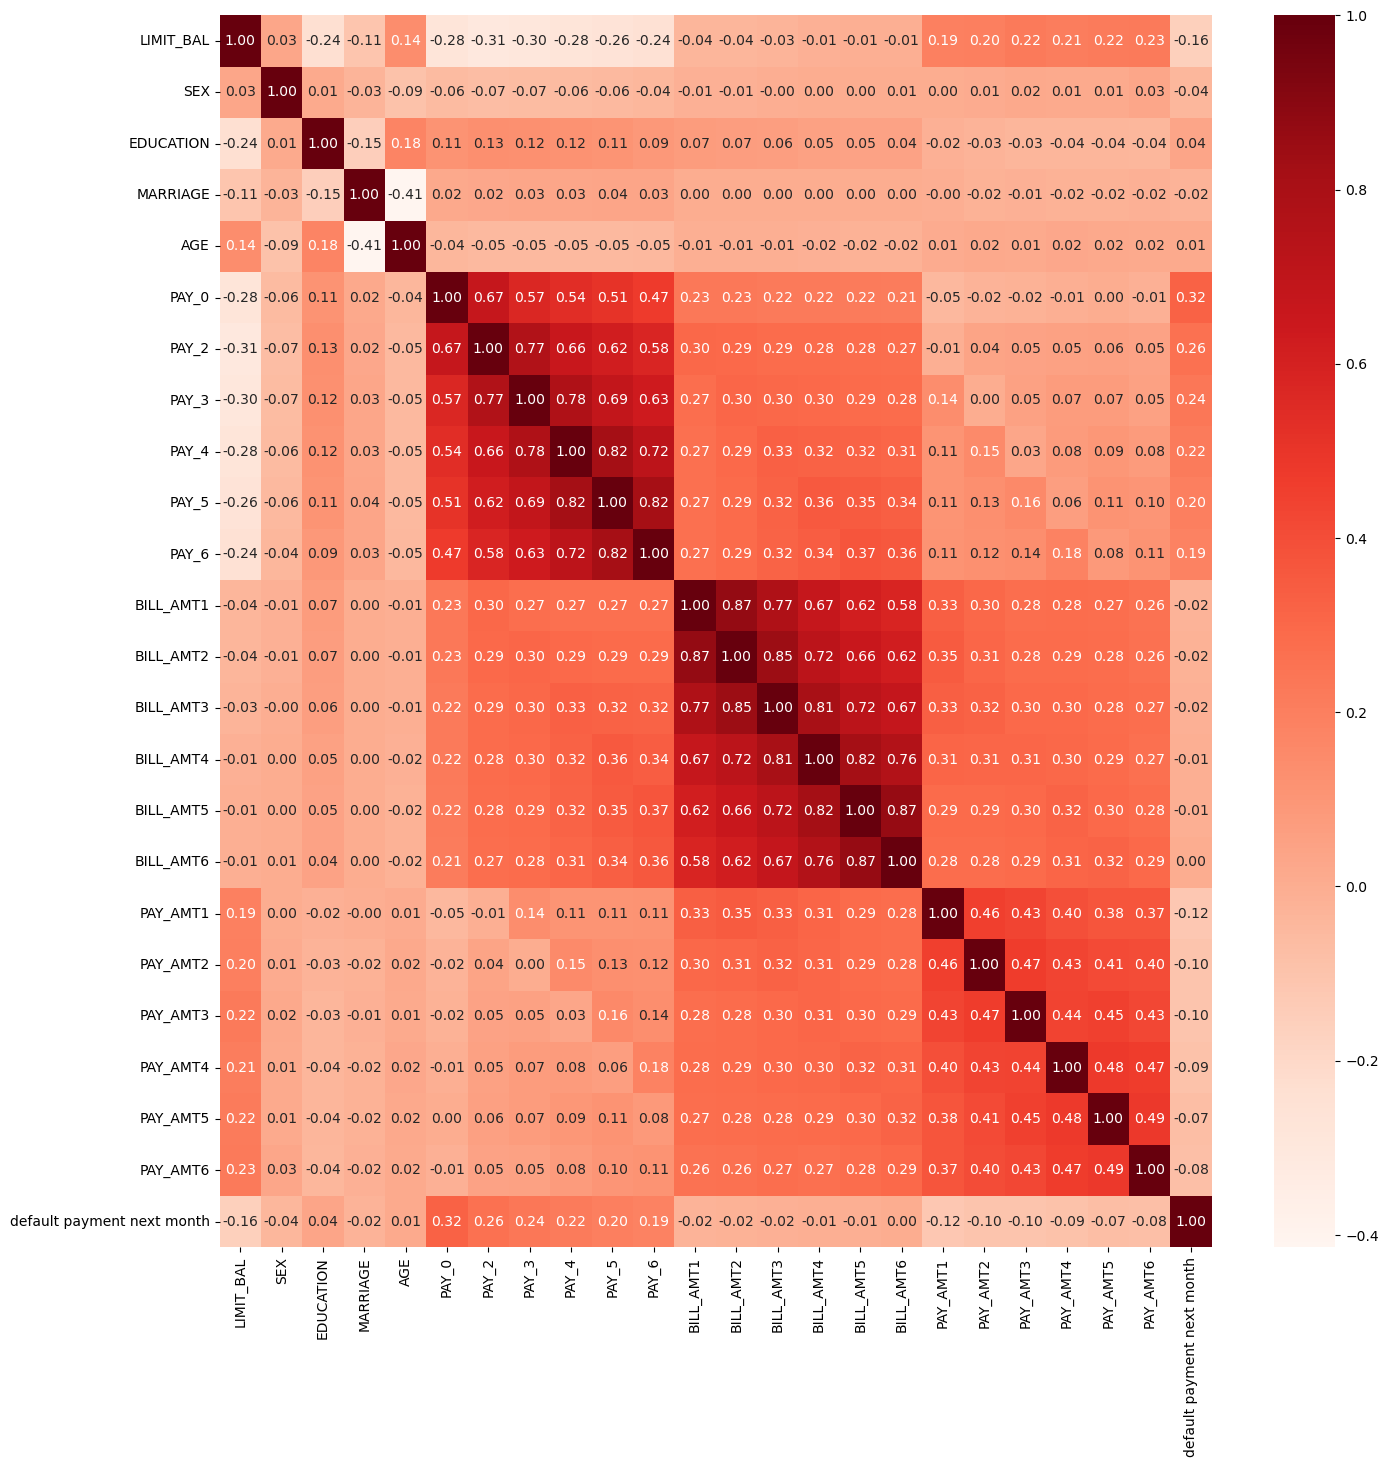

In [35]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, cmap='Reds', fmt='.2f')